## Missing around with regression

This is a notebook to apply my knowledge about Regression after my recent revision 😊

I'll take a look at the car dataset the first dataset I have used to build my first regression model two years ago and I may experiment on some more complex dataset later.

Libraries that I will use

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

Some plotting functions that we'll use later on

In [8]:
np.random.seed(72018)



def to_2d(array):
    return array.reshape(array.shape[0], -1)



def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data

def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

The function below will calculate the $R^2$
 on each feature given the a input model.

In [9]:
def get_R2_features(model,test=True):
    #X: global
    features=list(X)
    features.remove("three")

    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)

        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))

    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

The function below will plot the distribution of two inputs.

In [10]:
def  plot_dis(y,yhat):

    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

Loading and understanding our data

In [11]:
data = pd.read_csv('car_dataset.csv')

k = data.copy()

data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


Some visualization to some of the relationship between some features & the target variable.

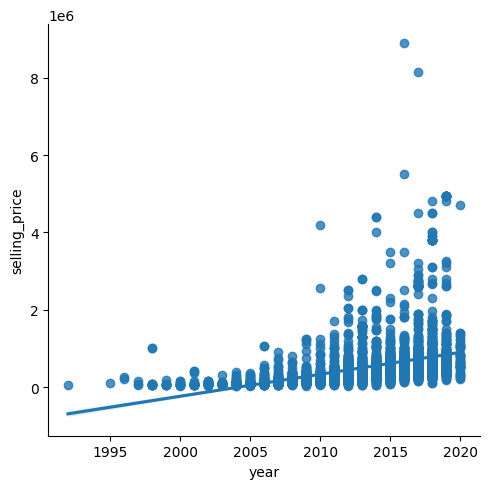

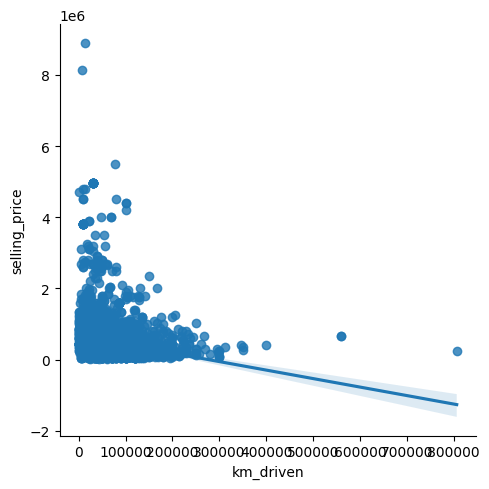

In [14]:
sns.lmplot(x="year", y="selling_price", data=data)
sns.lmplot(x="km_driven", y="selling_price", data=data)

Now let's get to work 🔥

Let's start with the data preprocessing

We see that the dataset have 5 features of the type object so we need to encode theme or git rid of some of they are useless.

In [15]:
# fuel	seller_type	transmission	owner

print(data['owner'].unique())
print(data['fuel'].unique())
print(data['seller_type'].unique())
print(data['transmission'].unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']


There is mutiple categorical features that has more than 2 values thus the best sort of action here will be OneHot encodeing for these features while the tranmission feature I'll use binary encoding with it.

In [16]:
data = pd.get_dummies(data,columns=['fuel','seller_type','owner'])
data['transmission'] = data['transmission'].map({'Manual':0,'Automatic':1})
data.head(10)

,name,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,False,True,False,False,False,False,True,False,True,False,False,False,False
3,Datsun RediGO T Option,2017,250000,46000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,False,True,False,False,False,False,True,False,False,False,True,False,False
5,Maruti Alto LX BSIII,2007,140000,125000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
7,Tata Indigo Grand Petrol,2014,240000,60000,0,False,False,False,False,True,False,True,False,False,False,True,False,False
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
9,Maruti Celerio Green VXI,2017,365000,78000,0,True,False,False,False,False,False,True,False,True,False,False,False,False


In [17]:
# The name is useless at least for this dataset so I'll remove it

data.drop('name',axis=1,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   year                          4340 non-null   int64
 1   selling_price                 4340 non-null   int64
 2   km_driven                     4340 non-null   int64
 3   transmission                  4340 non-null   int64
 4   fuel_CNG                      4340 non-null   bool 
 5   fuel_Diesel                   4340 non-null   bool 
 6   fuel_Electric                 4340 non-null   bool 
 7   fuel_LPG                      4340 non-null   bool 
 8   fuel_Petrol                   4340 non-null   bool 
 9   seller_type_Dealer            4340 non-null   bool 
 10  seller_type_Individual        4340 non-null   bool 
 11  seller_type_Trustmark Dealer  4340 non-null   bool 
 12  owner_First Owner             4340 non-null   bool 
 13  owner_Fourth & Above Owner    434

Is our data normal ? let's cheak

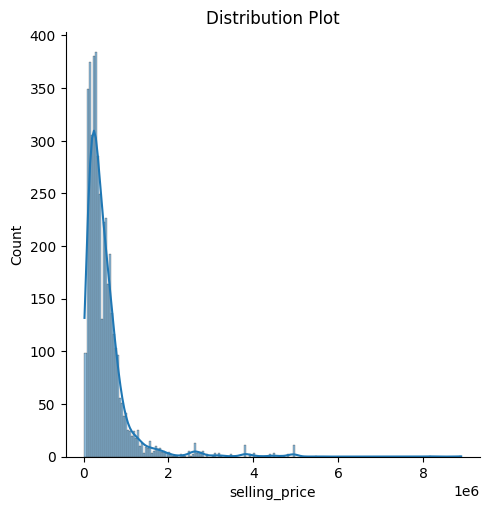

In [19]:
sns.displot(data['selling_price'], kde=True)
plt.title("Distribution Plot")
plt.show()

As we can see it's not distributed normally and the tail facing the right, so we'll have to transform it.

> Add blockquote



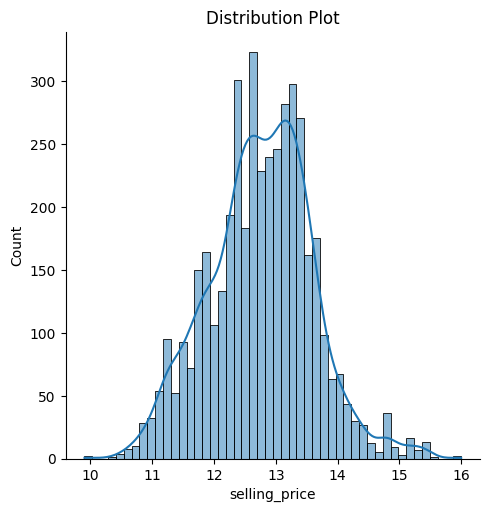

In [20]:
#log transformation method

tg1 = data['selling_price'].copy()

# Let's try the log transformation

lgtg = tg1.copy()

lgtg = np.log(lgtg)

sns.displot(lgtg, kde = True)
plt.title("Distribution Plot")
plt.show()

(array([   6.,   92.,  414.,  740., 1222., 1232.,  454.,  113.,   53.,
          14.]),
 array([ 9.90348755, 10.51329498, 11.12310241, 11.73290984, 12.34271727,
        12.95252469, 13.56233212, 14.17213955, 14.78194698, 15.39175441,
        16.00156183]),
 <BarContainer object of 10 artists>)

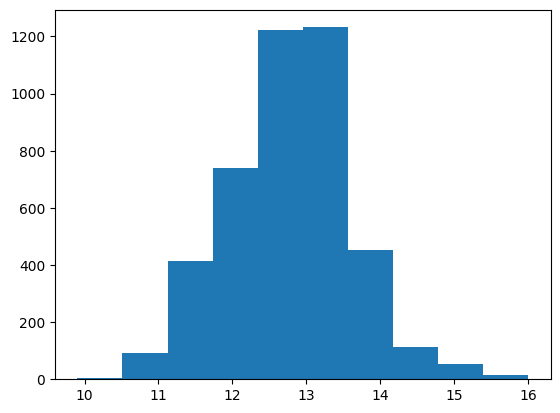

In [31]:
plt.hist(lgtg)

In [21]:
from scipy.stats import normaltest

normaltest(lgtg)

NormaltestResult(statistic=np.float64(13.155628356574784), pvalue=np.float64(0.0013908862038200577))

Even though the graph now is looking much better yet it's not normal.

Working with linear regression the main assumption we have that the data are normally distributed and to confirm this we should not be able to reject this assumption using visuals or statistics techniques.

Using statistics approach I'll be using normaltest provided by scipy and via the p-value if it's less than 0.05 we should reject the assumption otherewise the data is normally distributed.

So now I'll try other transformation methods.

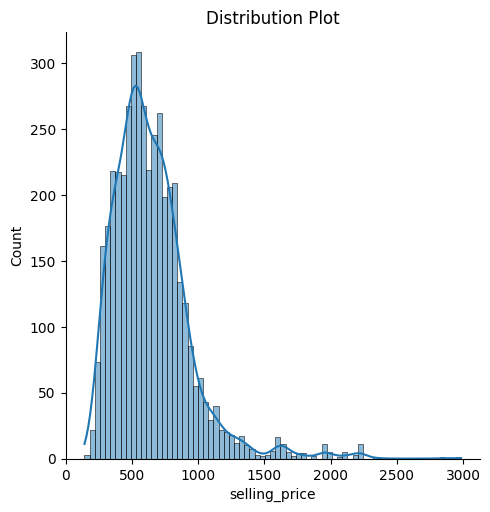

In [23]:
#Square root transformation

sqtg = tg1.copy()

sqtg = np.sqrt(sqtg)

sns.displot(sqtg, kde = True)
plt.title("Distribution Plot")
plt.show()

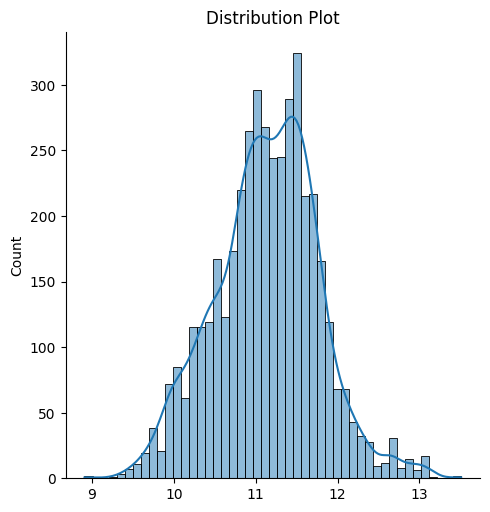

In [49]:
#boxcox transformation

from scipy.stats import boxcox

cxgt = tg1.copy()

cxgt, lamb = boxcox(cxgt)
cxgt = pd.Series(cxgt)

sns.displot(cxgt, kde = True)
plt.title("Distribution Plot")
plt.show()

In [50]:
normaltest(cxgt)

NormaltestResult(statistic=np.float64(7.4991429605043995), pvalue=np.float64(0.023527825834112746))

(array([   6.,   79.,  350.,  650., 1197., 1289.,  565.,  116.,   71.,
          17.]),
 array([ 8.90833169,  9.36859663,  9.82886158, 10.28912652, 10.74939146,
        11.2096564 , 11.66992135, 12.13018629, 12.59045123, 13.05071617,
        13.51098111]),
 <BarContainer object of 10 artists>)

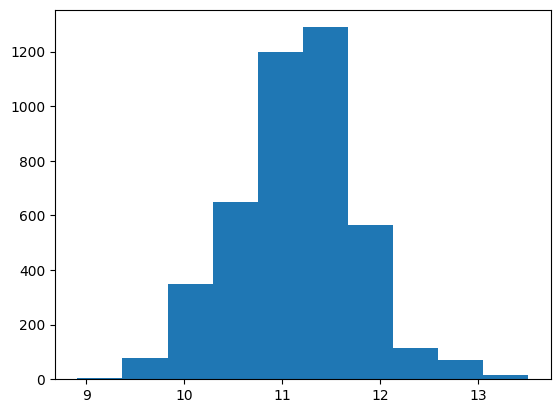

In [32]:
plt.hist(cxgt)

No matter what method we try it seames we can't make it normal and this maybe due to fact that or original data has outliers so let's cheak our original data

In [45]:
print("Skewness: %f" % data['selling_price'].skew())
print("Skewness for log transformed data: %f" % lgtg.skew())
print("Skewness for square root transformed data: %f" % sqtg.skew())
print("Skewness for boxcox transformed data: %f" % cxgt.skew())

Skewness: 4.892021
Skewness for log transformed data: 0.060163
Skewness for square root transformed data: 1.899609
Skewness for boxcox transformed data: -0.001403


Here I have a weird result where the skew of boxcox data is close to zero yet the normaltest p-value < 0.05, let's see what will happen after furthere cleaning

<Axes: xlabel='selling_price'>

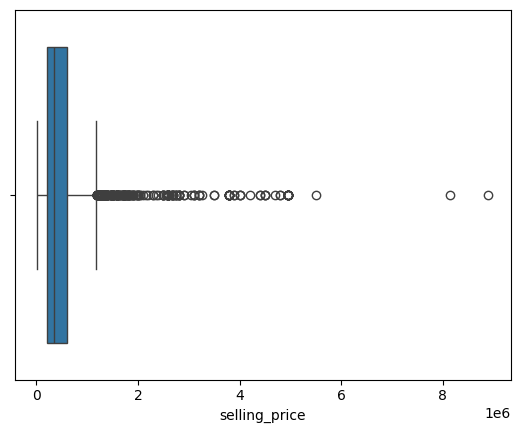

In [40]:
sns.boxplot(x=data['selling_price'])

<Axes: xlabel='selling_price'>

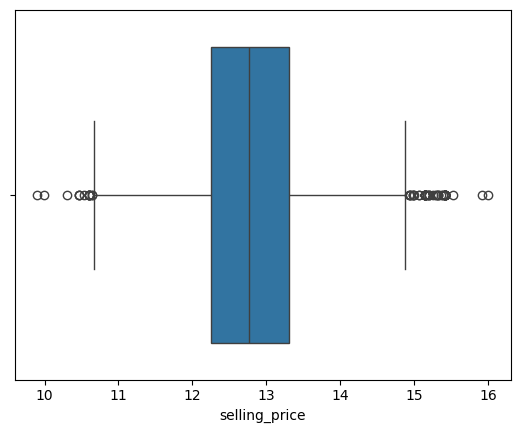

In [41]:
sns.boxplot(x=lgtg)

<Axes: xlabel='selling_price'>

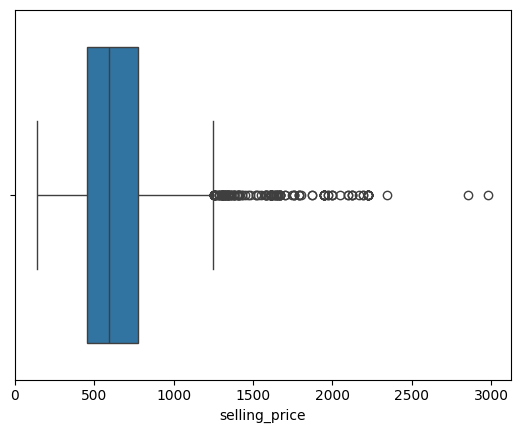

In [42]:
sns.boxplot(x=sqtg)

<Axes: >

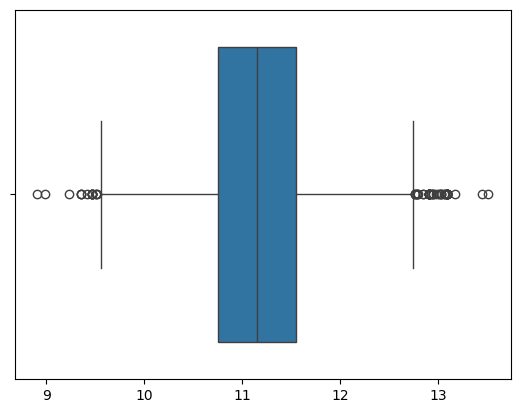

In [43]:
sns.boxplot(x=cxgt)

After researching I found out that is normal to have skew close to 0 while the normaltest tells you that the p-value < 0.05, So i'll ignore the normaltest and stick with the boccox transformation reasult.

## Training & testing

Now after preprocessing our data and making sure it's close to normal distribution I'm ready to go and fit the data in the models.

In [58]:
y_col = 'selling_price'
X = data.drop(y_col, axis=1)
y, lamb1 = boxcox(data[y_col])
y = pd.Series(y)
y.rename(y_col, inplace=True)

,selling_price
0,9.783302
1,10.415855
2,11.550623
3,10.889088
4,11.334630
...,...
4335,11.264445
4336,11.264445
4337,10.257161
4338,11.823319


Let's split our data for the training and testing.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let's call the model and start working.

In [61]:
lr       = LinearRegression()
error_df = list()

lr    = lr.fit(X_train, y_train)
y_pre = lr.predict(X_test)

error_df.append(['Linear Regression', mean_squared_error(y_test, y_pre), r2_score(y_test, y_pre)])

error_df

[['Linear Regression', 0.13517476872617662, 0.6715840661866856]]

Not bad but it could be better let's try other model and scale our data.


In [63]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled  = ss.transform(X_test)

lr2 = LinearRegression()
lr2 = lr2.fit(X_train_scaled, y_train)
y_pre2 = lr2.predict(X_test_scaled)

error_df.append(['Linear Regression Scaled', mean_squared_error(y_test, y_pre2), r2_score(y_test, y_pre2)])

error_df

[['Linear Regression', 0.13517476872617662, 0.6715840661866856],
 ['Linear Regression Scaled', 0.13517476872617692, 0.671584066186685]]

With normal Linear Regression scaling dose not but if consider regularization sacaling is realy importent.

In [64]:
alphas = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lass = Lasso(alpha=alphas[0])

lass = lass.fit(X_train, y_train)
y_pre3 = lass.predict(X_test)

error_df.append(['Lasso', mean_squared_error(y_test, y_pre3), r2_score(y_test, y_pre3)])

error_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+00, tolerance: 1.215e-01
  model = cd_fast.enet_coordinate_descent(


[['Linear Regression', 0.13517476872617662, 0.6715840661866856],
 ['Linear Regression Scaled', 0.13517476872617692, 0.671584066186685],
 ['Lasso', 0.13517291297278075, 0.6715885748608279]]

In [65]:
from sklearn.linear_model import LassoCV

lasscv = LassoCV(alphas=alphas,
                  max_iter=int(5e4),
                  cv=3).fit(X_train, y_train)

y_pre4  = lasscv.predict(X_test)

error_df.append(['Lasso CV', mean_squared_error(y_test, y_pre4), r2_score(y_test, y_pre4)])

error_df

[['Linear Regression', 0.13517476872617662, 0.6715840661866856],
 ['Linear Regression Scaled', 0.13517476872617692, 0.671584066186685],
 ['Lasso', 0.13517291297278075, 0.6715885748608279],
 ['Lasso CV', 0.13517282412114628, 0.67158879073168]]